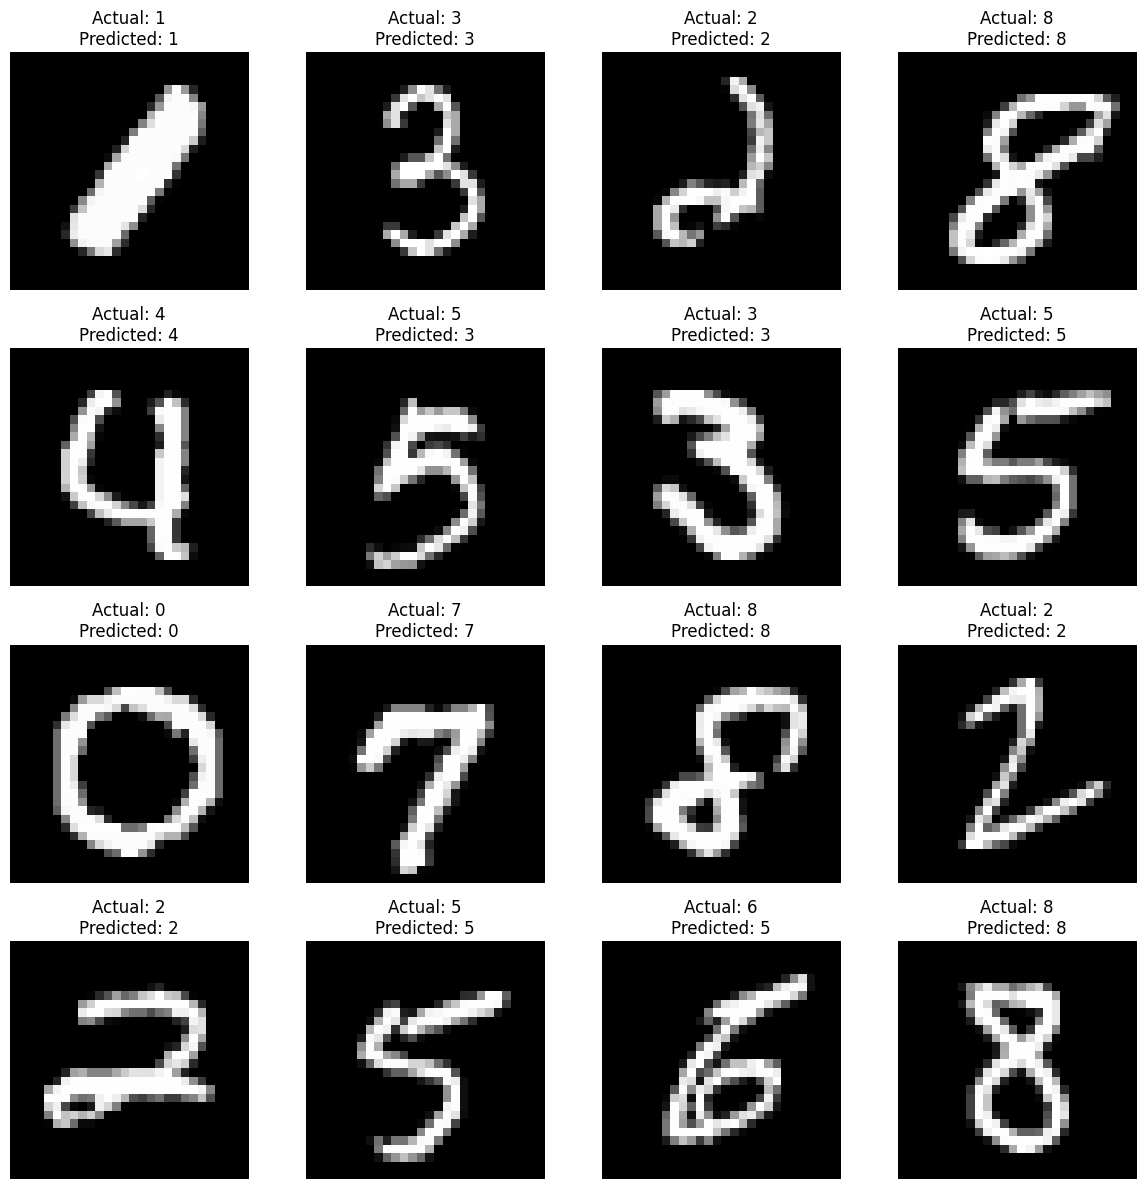

In [1]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import random

# Define a transformation to convert the image to a tensor
transform = transforms.Compose([
    transforms.ToTensor()
])

# Load the test set with transformation
test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=transform
)

# Load the optimized model (traced and optimized for mobile)
optimized_model = torch.jit.load("optimized_model.ptl")

# Set the model to evaluation mode
optimized_model.eval()

# Select 16 random indices from the test dataset
random_indices = random.sample(range(len(test_data)), 16)

# Plot the 16 randomly selected images
fig, axes = plt.subplots(4, 4, figsize=(12, 12))  # Create a 4x4 grid of subplots

for i, ax in enumerate(axes.flat):
    # Get a random image and its label
    index = random_indices[i]
    image, label = test_data[index]

    # Add a batch dimension (model expects a batch of images)
    image_batch = image.unsqueeze(0)

    # Run inference with the optimized model
    with torch.no_grad():
        prediction = optimized_model(image_batch)

    # Get the predicted class (raw logits, you may need softmax)
    predicted_label = torch.argmax(prediction, dim=1).item()

    # Display the image with actual and predicted labels
    ax.imshow(image.squeeze(), cmap="gray")
    ax.set_title(f"Actual: {label}\nPredicted: {predicted_label}")
    ax.axis("off")  # Remove axes for clarity

plt.tight_layout()
plt.show()